In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
data= {'X':[23,24,26,27],'y':[50,70,80,85]}
data= pd.DataFrame(data, columns= data.keys())
data

,X,y
0,23,50
1,24,70
2,26,80
3,27,85


In [3]:
X= np.array([23,24,26,27])
y= np.array([50,70,80,85])

In [4]:
lambda_value= 0
depth=1
learning_rate= 0.3
f0= np.mean(y)
print("Initial prediction: f0=", f0)

Initial prediction: f0= 71.25


In [5]:
residual= y- f0
sum_of_residual= np.sum(residual)
num_of_residuals= len(y)

similarity_score= (sum_of_residual**2)/ (num_of_residuals+ lambda_value)

print(f"Similarity score for root: {similarity_score}")

Similarity score for root: 0.0


In [6]:
def compute_similarity_score(residuals, lamda_value):
    sum_residuals= np.sum(residuals)
    num_of_residuals= len(residuals)
    similarity_score= (sum_residuals **2)/ (num_of_residuals+ lambda_value)
    return similarity_score

def split_similarity(X, y, threshold):
    left_indices= X < threshold
    right_indices= X >= threshold

    left_residuals= residual[left_indices]
    right_residuals= residual[right_indices]
    
    similarity_score_left= compute_similarity_score(left_residuals,lambda_value)
    similarity_score_right= compute_similarity_score(right_residuals,lambda_value)
    
    return similarity_score_left, similarity_score_right

In [7]:
# Case i: X < 23.5
similarity_left_i, similarity_right_i = split_similarity(X, y, 23.5)
# Case ii: X < 25
similarity_left_ii, similarity_right_ii = split_similarity(X, y, 25)
# Case iii: X < 26.5
similarity_left_iii, similarity_right_iii = split_similarity(X, y, 26.5)

print(f"Case i (X < 23.5) -> Left: {similarity_left_i}, Right: {similarity_right_i}")
print(f"Case ii (X < 25) -> Left: {similarity_left_ii}, Right: {similarity_right_ii}")
print(f"Case iii (X < 26.5) -> Left: {similarity_left_iii}, Right: {similarity_right_iii}")


Case i (X < 23.5) -> Left: 451.5625, Right: 150.52083333333334
Case ii (X < 25) -> Left: 253.125, Right: 253.125
Case iii (X < 26.5) -> Left: 63.020833333333336, Right: 189.0625


In [8]:
def compute_gain(similarity_left, similarity_right, similarity_root):
    gain= similarity_left+ similarity_right- similarity_root
    return gain

In [10]:
gain_i = compute_gain(similarity_left_i, similarity_right_i, similarity_score)
gain_ii = compute_gain(similarity_left_ii, similarity_right_ii, similarity_score)
gain_iii = compute_gain(similarity_left_iii, similarity_right_iii, similarity_score)

print(f"Gain for case i (X < 23.5): {gain_i}")
print(f"Gain for case ii (X < 25): {gain_ii}")
print(f"Gain for case iii (X < 26.5): {gain_iii}")

Gain for case i (X < 23.5): 602.0833333333334
Gain for case ii (X < 25): 506.25
Gain for case iii (X < 26.5): 252.08333333333334


In [11]:
best_gain = max(gain_i, gain_ii, gain_iii)
if best_gain == gain_i:
    best_split = 23.5
elif best_gain == gain_ii:
    best_split = 25
else:
    best_split = 26.5

print(f"Best split based on highest Gain: X < {best_split}")

Best split based on highest Gain: X < 23.5


In [12]:
def compute_output(residuals):
    return np.sum(residual)/ len(residual)

In [13]:
left_residual= residual[X< best_split]
right_residual= residual[X >= best_split]
output_left= compute_output(left_residual)
output_right= compute_output(right_residual)
print(f"Output for left node: {output_left}")
print(f"Output for right node: {output_right}")

Output for left node: 0.0
Output for right node: 0.0


In [14]:
x_value = 25

if x_value < best_split:
    output = output_left
else:
    output = output_right

# Final prediction
prediction = f0 + learning_rate * output
print(f"Prediction for x = {x_value}: {prediction}")

Prediction for x = 25: 71.25


In [38]:
X=np.array([23,24,26,27])
y= np.array([0,0,1,1])

lambda_value=0
max_depth=1
learning_rate=0.3


In [39]:
f0= 0.5
previous_prob= np.full(len(X), f0)
residuals= y- f0
sum_of_residual= np.sum(residuals)

In [40]:
def compute_similarity_score(sum_residuals, previous_prob, lambda_value):
    total_p= np.sum(previous_prob *(1-previous_prob))
    return (sum_residuals**2)/ (total_p + lambda_value)

similarity_score_root= compute_similarity_score(sum_of_residual, previous_prob,lambda_value)
print(f"Similarity Score for root: {similarity_score_root}")

Similarity Score for root: 0.0


In [43]:
def split_and_compute_similarity(X, Y, threshold, residuals, previous_prob, lambda_value):
    left_indices = X < threshold
    right_indices = X >= threshold

    left_residuals = residuals[left_indices]
    right_residuals = residuals[right_indices]

    sum_left_residuals = np.sum(left_residuals)
    sum_right_residuals = np.sum(right_residuals)

    similarity_left = compute_similarity_score(sum_left_residuals, previous_prob[left_indices], lambda_value)
    similarity_right = compute_similarity_score(sum_right_residuals, previous_prob[right_indices], lambda_value)

    return similarity_left, similarity_right

# Case i: X < 23.5
similarity_left_i, similarity_right_i = split_and_compute_similarity(X, y, 23.5, residuals, previous_prob, lambda_value)

# Case ii: X < 25
similarity_left_ii, similarity_right_ii = split_and_compute_similarity(X, y, 25, residuals, previous_prob, lambda_value)

# Case iii: X < 26.5
similarity_left_iii, similarity_right_iii = split_and_compute_similarity(X, y, 26.5, residuals, previous_prob, lambda_value)

print(f"Similarity Scores for X < 23.5: Left={similarity_left_i}, Right={similarity_right_i}")
print(f"Similarity Scores for X < 25: Left={similarity_left_ii}, Right={similarity_right_ii}")
print(f"Similarity Scores for X < 26.5: Left={similarity_left_iii}, Right={similarity_right_iii}")

Similarity Scores for X < 23.5: Left=1.0, Right=0.3333333333333333
Similarity Scores for X < 25: Left=2.0, Right=2.0
Similarity Scores for X < 26.5: Left=0.3333333333333333, Right=1.0


In [44]:
def compute_gain(similarity_left, similarity_right, similarity_root):
    return similarity_left + similarity_right - similarity_root


gain_i = compute_gain(similarity_left_i, similarity_right_i, similarity_score_root)
gain_ii = compute_gain(similarity_left_ii, similarity_right_ii, similarity_score_root)
gain_iii = compute_gain(similarity_left_iii, similarity_right_iii, similarity_score_root)
print(f"Gain for X < 23.5: {gain_i}")
print(f"Gain for X < 25: {gain_ii}")
print(f"Gain for X < 26.5: {gain_iii}")

Gain for X < 23.5: 1.3333333333333333
Gain for X < 25: 4.0
Gain for X < 26.5: 1.3333333333333333


## EX4

In [46]:
!gdown --id 1pVdH-2b_odeuEPdXbLQYDcHXxgqqBK4i

C:\Users\tuann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pVdH-2b_odeuEPdXbLQYDcHXxgqqBK4i
To: c:\Users\tuann\OneDrive\Desktop\AIO_M3\w4_\Problem4.csv

  0%|          | 0.00/12.3k [00:00<?, ?B/s]
100%|██████████| 12.3k/12.3k [00:00<?, ?B/s]


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [48]:
data= pd.read_csv('Problem4.csv')
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [49]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Targe

In [52]:
# check if data have categorical column
categorical_cols= data.select_dtypes(include=['object','bool']).columns.to_list()
categorical_cols

[]

In [53]:
# split train/test data
X,y= data.iloc[:,:-1], data.iloc[:,-1]
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size= 0.2, random_state= 42)

In [54]:
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of val samples: {X_test.shape[0]}')

Number of training samples: 142
Number of val samples: 36


In [55]:
# training
xg_classifier= xgb.XGBClassifier(seed= 42)
xg_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [56]:
y_pred= xg_classifier.predict(X_test)

In [58]:
train_acc = accuracy_score(y_train, xg_classifier.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f'Train ACC: {train_acc}')
print(f'Test ACC: {test_acc}')

Train ACC: 1.0
Test ACC: 0.9444444444444444


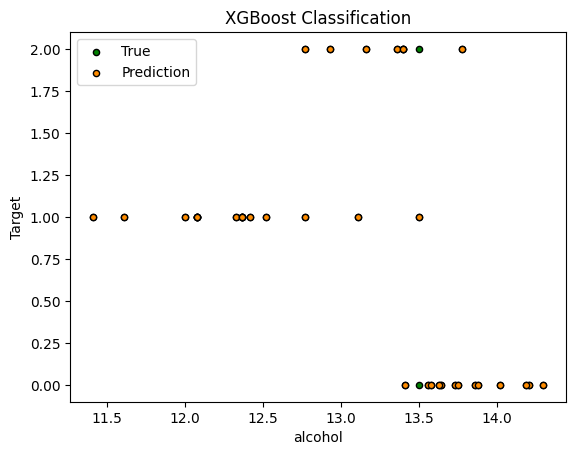

In [59]:
plt.figure()
plt.scatter(X_test['alcohol'], y_test, s=20, edgecolor="black", c="green", label="True")
plt.scatter(X_test['alcohol'], y_pred, s=20, edgecolor="black", c="darkorange", label="Prediction")
plt.xlabel("alcohol")
plt.ylabel("Target")
plt.title("XGBoost Classification")
plt.legend()
plt.show()

In [60]:
!gdown --id 1xwJmYJxEia06sxUdJyGO7JFx4DNK1fbp

C:\Users\tuann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xwJmYJxEia06sxUdJyGO7JFx4DNK1fbp
To: c:\Users\tuann\OneDrive\Desktop\AIO_M3\w4_\Problem3.csv

  0%|          | 0.00/37.4k [00:00<?, ?B/s]
100%|██████████| 37.4k/37.4k [00:00<00:00, 1.07MB/s]


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [62]:
data= pd.read_csv('Problem3.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,4.468204,26.2,94.3,1.808289,8.2,51,6.7,False,0.0
1,7,4,oct,tue,4.517431,35.4,669.1,2.041220,18.0,33,0.9,False,0.0
2,7,4,oct,sat,4.517431,43.7,686.9,2.041220,14.6,33,1.3,False,0.0
3,8,6,mar,fri,4.529368,33.3,77.5,2.302585,8.3,97,4.0,True,0.0
4,8,6,mar,sun,4.503137,51.3,102.2,2.360854,11.4,99,1.8,False,0.0


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       510 non-null    int64  
 1   Y       510 non-null    int64  
 2   month   510 non-null    object 
 3   day     510 non-null    object 
 4   FFMC    510 non-null    float64
 5   DMC     510 non-null    float64
 6   DC      510 non-null    float64
 7   ISI     510 non-null    float64
 8   temp    510 non-null    float64
 9   RH      510 non-null    int64  
 10  wind    510 non-null    float64
 11  rain    510 non-null    bool   
 12  area    510 non-null    float64
dtypes: bool(1), float64(7), int64(3), object(2)
memory usage: 48.4+ KB


In [64]:
categorical_cols= data.select_dtypes(include=['object','bool']).columns.to_list()
categorical_cols

['month', 'day', 'rain']

In [66]:
for col_name in categorical_cols:
    n_categories = data[col_name].nunique()
    print(f'Number of categories in {col_name}: {n_categories}')

Number of categories in month: 12
Number of categories in day: 7
Number of categories in rain: 2


In [67]:
ordinal_encoder= OrdinalEncoder()
encoded_categorical_cols= ordinal_encoder.fit_transform(data[categorical_cols])
encoded_categorical_df = pd.DataFrame(
  encoded_categorical_cols ,
  columns = categorical_cols
)
numerical_df = data.drop(categorical_cols , axis =1)
encoded_df = pd.concat([numerical_df, encoded_categorical_df ] , axis =1)

In [68]:
encoded_df

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,area,month,day,rain
0,7,5,4.468204,26.2,94.3,1.808289,8.2,51,6.7,0.000000,7.0,0.0,0.0
1,7,4,4.517431,35.4,669.1,2.041220,18.0,33,0.9,0.000000,10.0,5.0,0.0
2,7,4,4.517431,43.7,686.9,2.041220,14.6,33,1.3,0.000000,10.0,2.0,0.0
3,8,6,4.529368,33.3,77.5,2.302585,8.3,97,4.0,0.000000,7.0,0.0,1.0
4,8,6,4.503137,51.3,102.2,2.360854,11.4,99,1.8,0.000000,7.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,4,3,4.414010,56.7,665.6,1.064711,27.8,32,2.7,2.006871,1.0,3.0,0.0
506,2,4,4.414010,56.7,665.6,1.064711,21.9,71,5.8,4.012592,1.0,3.0,0.0
507,7,4,4.414010,56.7,665.6,1.064711,21.2,70,6.7,2.498152,1.0,3.0,0.0
508,1,4,4.558079,146.0,614.7,2.509599,25.6,42,4.0,0.000000,1.0,2.0,0.0


In [69]:
X= encoded_df.drop(columns=['area'])
y= encoded_df['area']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
xg_reg= xgb.XGBRegressor(seed= 42,learning_rate= 0.01, n_estimators= 102, max_depth= 3)

In [72]:
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=102, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [73]:
y_pred= xg_reg.predict(X_test)

In [75]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Evaluation results on test set:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Evaluation results on test set:
Mean Absolute Error: 1.162894231208707
Mean Squared Error: 1.9422400918859453


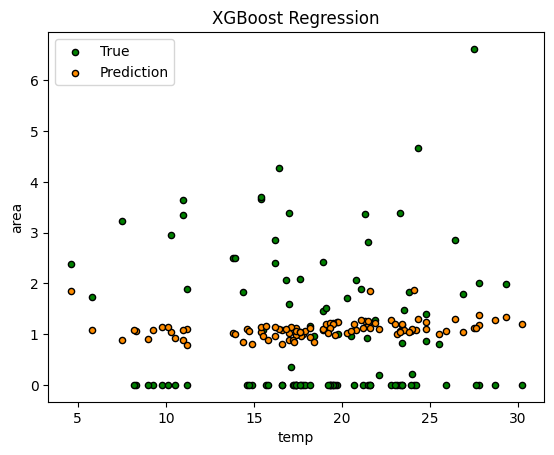

In [76]:
plt.figure()
plt.scatter(X_test['temp'], y_test, s=20, edgecolor="black", c="green", label="True")
plt.scatter(X_test['temp'], y_pred, s=20, edgecolor="black", c="darkorange", label="Prediction")
plt.xlabel("temp")
plt.ylabel("area")
plt.title("XGBoost Regression")
plt.legend()
plt.show()